# Load example

In [1]:
# To set up the environment
# ENV["PYTHON"] = "/home/simon/anaconda3/envs/dev_sarpy/bin/python"   #path of the python program you want
# using Pkg; Pkg.build("PyCall")

Load libaries

In [2]:
using PyCall
using Statistics
using Images

Function to plot image

In [19]:
show_image(image,qmax=0.95) = Gray.(Float32.(image)./quantile(reshape(image, :), qmax))

show_image (generic function with 2 methods)

Import `sarpy` module

In [7]:
pushfirst!(PyVector(pyimport("sys")["path"]), "") # Adding the current folder as a path
sarpy_load = pyimport("sarpy.load") # import sarpy

PyObject <module 'sarpy.load' from '/home/simon/Desktop/dev_sarpy/sarpy/sarpy/load.py'>

### Load the image like in Load_example

In [8]:
path = "/home/simon/Desktop/dev_sarpy/test_data/S1A_IW_GRDH_1SDV_20181009T171427_20181009T171452_024062_02A131_E887.SAFE"
test = sarpy_load[:sar_load](path,["VH","VV"],location=(43.20203134094203, 9.326176488289917),size=(4800,4000))

PyObject Mission: SENTINEL-1A 
 Bands: ['VH', 'VV']

In [10]:
keys(test)

39-element Array{Symbol,1}:
 :__class__       
 :__delattr__     
 :__dict__        
 :__dir__         
 :__doc__         
 :__eq__          
 :__format__      
 :__ge__          
 :__getattribute__
 :__getitem__     
 :__gt__          
 :__hash__        
 :__init__        
 ⋮                
 :band_meta       
 :band_names      
 :bands           
 :calibration     
 :footprint       
 :geo_tie_point   
 :get_coordinate  
 :get_index       
 :mission         
 :product_meta    
 :simple_plot     
 :time            

### Look at meta data

In [11]:
test[:band_names]

2-element Array{String,1}:
 "VH"
 "VV"

In [12]:
test[:footprint]

Dict{Any,Any} with 2 entries:
  "latitude"  => [42.9542, 43.0191, 43.3853, 43.4502]
  "longitude" => [9.14, 9.62242, 9.02833, 9.51415]

In [15]:
test[:time]

2018-10-09T17:14:27.947

### Plot VH

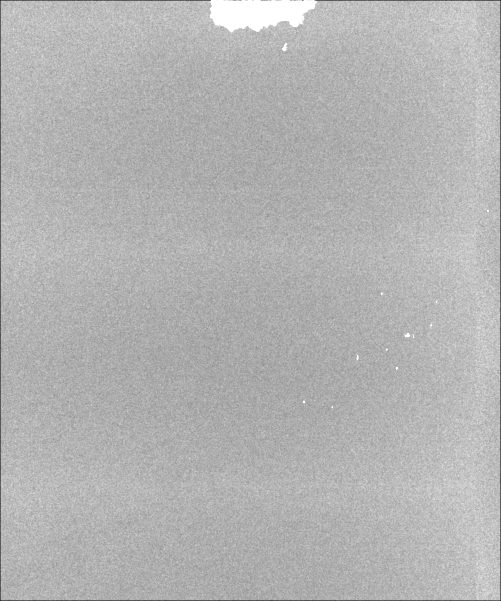

In [21]:
show_image(test[:bands][1])

### Plot VV

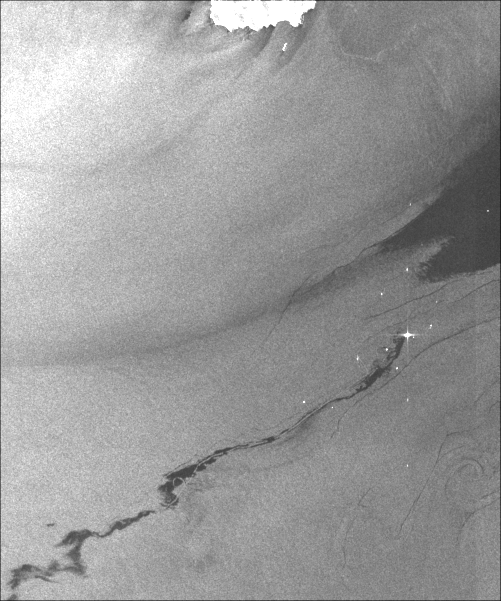

In [20]:
show_image(test[:bands][2])

### Looking at Meta data
note that "azimuth_time" is still a python object and must be converted explicit

In [42]:
test[:calibration][1]

Dict{Any,Any} with 8 entries:
  "abs_calibration_const" => 1.0
  "column"                => [-5000, -4960, -4920, -4880, -4840, -4800, -4760, …
  "azimuth_time"          => PyObject array(['2018-10-09T17:14:53.947118', '201…
  "dn"                    => [474.0, 474.0, 474.0, 474.0, 474.0, 474.0, 474.0, …
  "gamma"                 => [615.434, 615.089, 614.745, 614.402, 614.059, 613.…
  "row"                   => [-105, -105, -105, -105, -105, -105, -105, -105, -…
  "sigma_0"               => [663.614, 663.339, 663.065, 662.791, 662.518, 662.…
  "beta_0"                => [474.0, 474.0, 474.0, 474.0, 474.0, 474.0, 474.0, …

### Using Method
This block show how to use a `SarImage` method from python

In [45]:
test[:get_coordinate](2900,3200)

(43.26680469797069, 9.459993573723967)